### Chromatograms_Shimadzu

* This method allows for the use of chromatographic data from HPLC-DAD for further mathematics analysis. It creates a matrix with RT(min) and intensity data for a given wavelength.

### Português
Este foi criado para extrair dados de arquivos exportados do HPLC-DAD (Shimadzu) do IPPN-UFRJ. Ele cria uma tabela com eixo RT(min) e os dados de intensidade de um comprimento de onda; este foi excolhido na etapa de extração do instrumento.

A. Início no Instrumento:

1. Selecionar o dado
2. Observar o comprimento de onda usado
3. Observar se há zoom, os tempos de retenção
4. File -> Exportar -> ASCII
5. Selecionar a opção "Chromatogram", apenas esta e desmarcar todas as outras
6. Definir corretamente o caminho onde o novo arquivo será salvo e utilizar o nome da própria amostra para o filename


In [7]:
import os
import os.path
import pandas as pd
import glob
import matplotlib.pyplot as plt

import data_processing as dp

In [8]:
%pwd

'C:\\Users\\borge\\Documents\\DBsimilarity'

In [9]:
directory_path = r'C:\Users\borge\Desktop\HPLC DATA ARISTOLOCHIA_ANDREW'
os.chdir(directory_path)
%pwd

'C:\\Users\\borge\\Desktop\\HPLC DATA ARISTOLOCHIA_ANDREW'

### Converte os arquivos exportados para arquivos de tabela simples

In [17]:
# Import data
input_folder = directory_path
output_folder = directory_path
retention_time_start = 4
retention_time_end = 30
combined_df2 = dp.combine_and_trim_data(input_folder, output_folder, retention_time_start, retention_time_end)
#combined_df2

#### Análise dos dados

In [15]:
combined_df2.shape

(2625, 48)

In [18]:
import plotly.graph_objects as go

# Create a Plotly figure
fig = go.Figure()

# Define the range of columns you want to plot (columns 1 to 25 in this case)
start_column = 1
end_column = 25

# Loop through the specified range of columns and add a line trace to the figure for each
for column in combined_df2.columns[start_column:end_column + 1]:
    fig.add_trace(go.Scatter(x=combined_df2['RT(min)'], y=combined_df2[column], mode='lines', name=column))

# Update layout with titles and labels
fig.update_layout(
    title='Chromatogram Overlapping',
    xaxis_title='RT (min)',
    yaxis_title='Intensity',
    legend_title='Samples',
    hovermode='closest'  # Update hover mode
)

# Show the interactive plot
fig.show()



### Alignment

In [21]:
combined_df2.columns

Index(['RT(min)', 'BR 1', 'BR 2', 'EXT ALCALOIDE', 'EXT ETOH ARISTOLOCHIA',
       'EXTRATO AQUOSO ARISTOLOCHIA', 'FR01', 'FR02', 'FR03', 'FR04', 'FR05',
       'FR06', 'FR07', 'FR08', 'FR09', 'FR10', 'FR11', 'FR12', 'FR13', 'FR14',
       'FR15', 'FR16', 'FR17', 'FR18', 'FR19', 'FR20', 'FR21', 'FR22', 'FR23',
       'FR24', 'FR25', 'FR26', 'FR27', 'FR28', 'FR29', 'FR30', 'FR31', 'FR32',
       'FR33', 'FR34', 'FR35', 'FR36', 'FR37', 'FR38', 'FR39', 'FR40', 'FR41',
       'FR42'],
      dtype='object')

In [24]:
aligned_df, shifts = dp.align_samples_to_median(combined_df2)#, 'EXTRATO AQUOSO ARISTOLOCHIA')
#aligned_df

# Create a Plotly figure
fig = go.Figure()

# Define the range of columns you want to plot (columns 1 to 25 in this case)
start_column = 1
end_column = 25

# Loop through the specified range of columns and add a line trace to the figure for each
for column in aligned_df.columns[start_column:end_column + 1]:
    fig.add_trace(go.Scatter(x=aligned_df['RT(min)'], y=aligned_df[column], mode='lines', name=column))

# Update layout with titles and labels
fig.update_layout(
    title='Chromatogram Overlapping',
    xaxis_title='RT (min)',
    yaxis_title='Intensity',
    legend_title='Samples',
    hovermode='closest'  # Update hover mode
)

# Show the interactive plot
fig.show()

### Normalization

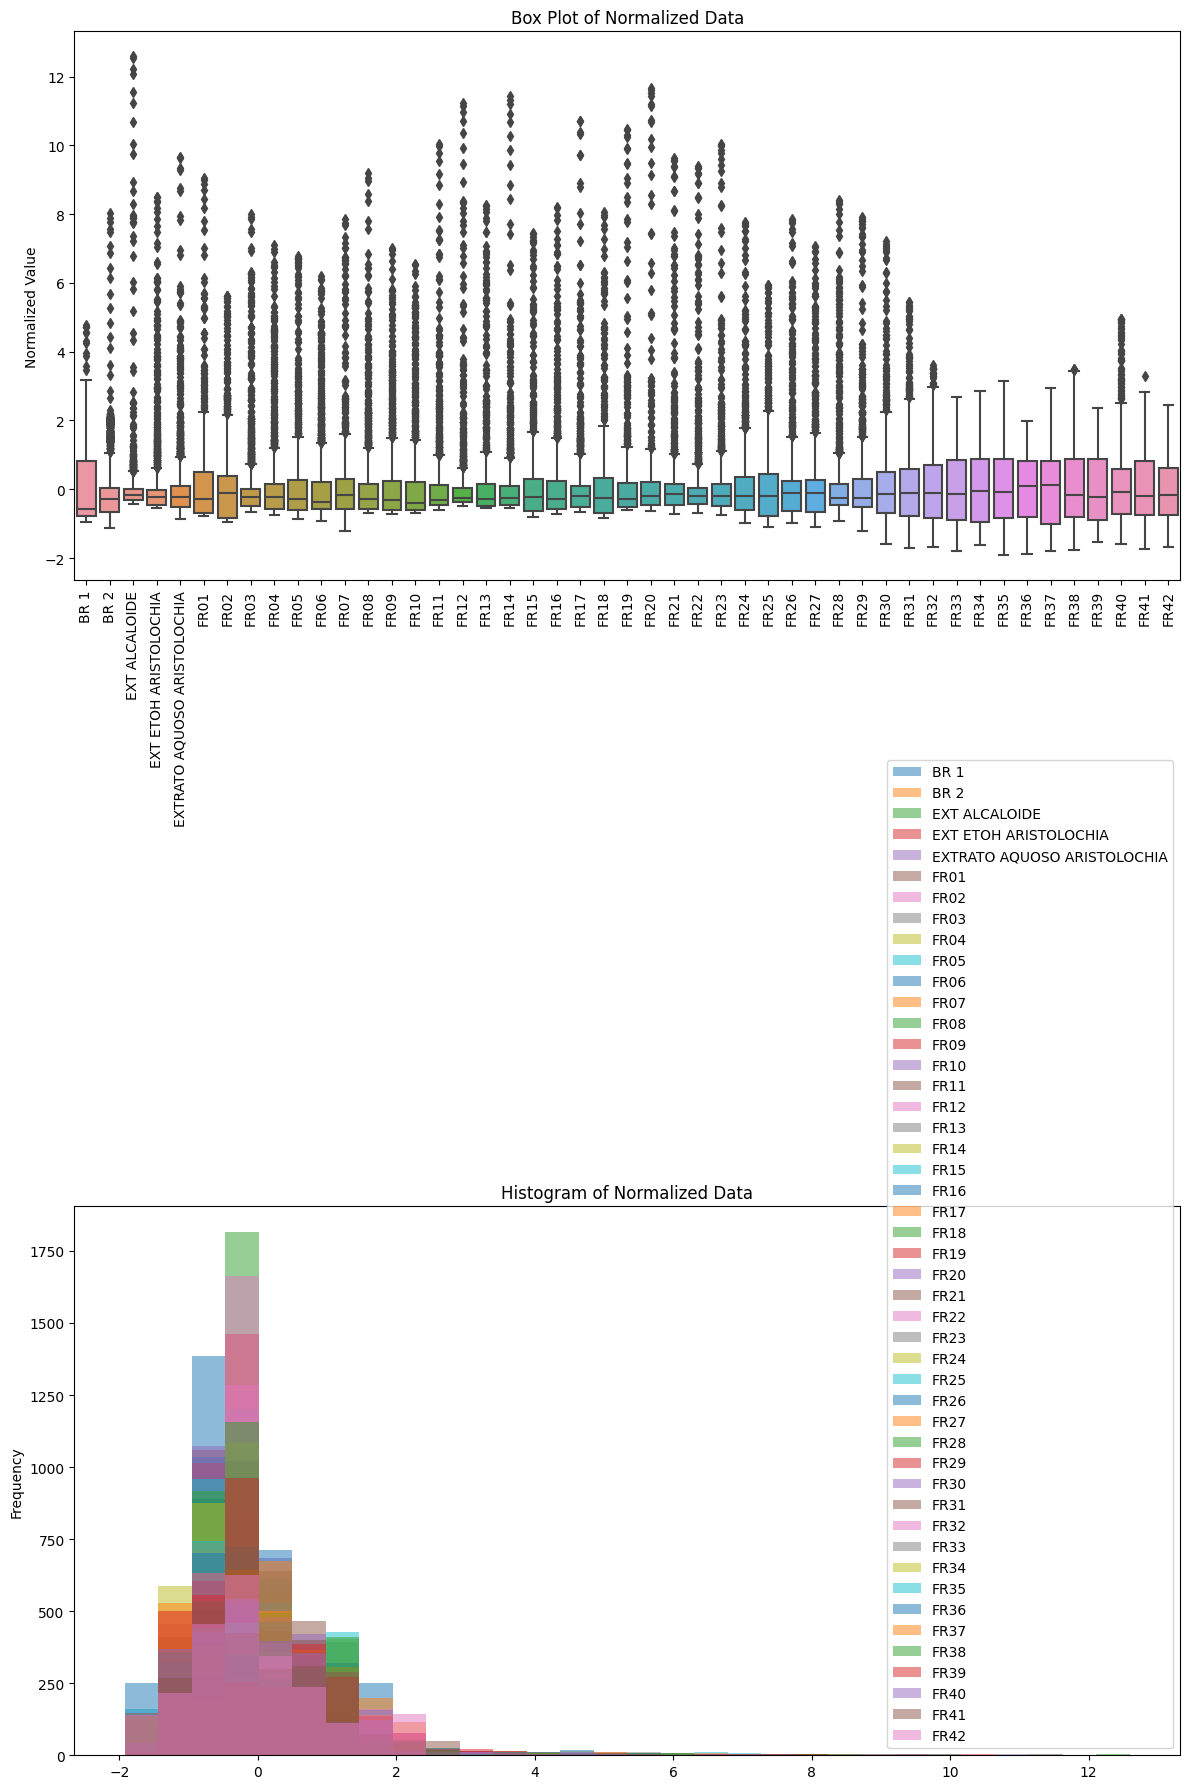

In [38]:
normalized_df = dp.z_score_normalize(aligned_df.drop("RT(min)", axis=1).copy())
#normalized_df

import seaborn as sns

#plt.figure(figsize=(12, 6))
#sns.boxplot(data=normalized_df)
#plt.xticks(rotation=90)
#plt.ylabel('Normalized Value')
#plt.title('Box Plot of Normalized Data')
#plt.show()

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 18))

# Box plot
sns.boxplot(data=normalized_df, ax=axes[0])
axes[0].set_title('Box Plot of Normalized Data')
axes[0].set_ylabel('Normalized Value')
axes[0].tick_params(axis='x', rotation=90)

# Histogram
normalized_df.plot(kind='hist', bins=30, alpha=0.5, ax=axes[1])
axes[1].set_title('Histogram of Normalized Data')
#axes[1].set_xlabel('Normalized Value')

plt.tight_layout()
plt.show()

### Scaling

In [ ]:
scaled_df = dp.min_max_scale(normalized_df.copy(), 0, 1)  # Example range 0 to 1
#normalized_df

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 18))

# Box plot
sns.boxplot(data=scaled_df, ax=axes[0])
axes[0].set_title('Box Plot of Scaled Data')
axes[0].set_ylabel('Scaled Value')
axes[0].tick_params(axis='x', rotation=90)

# Histogram
scaled_df.plot(kind='hist', bins=30, alpha=0.5, ax=axes[1])
axes[1].set_title('Histogram of Scaled Data')
#axes[1].set_xlabel('Scaled Value')

plt.tight_layout()
plt.show()

### PCA

In [21]:
import plotly.express as px

def plot_pca_scores(scores_df, pc_x, pc_y, explained_variance):
    """
    Create an interactive scatter plot for specified PCA components.

    Parameters:
    scores_df (pd.DataFrame): DataFrame containing PCA scores.
    pc_x (int): The principal component number for the x-axis.
    pc_y (int): The principal component number for the y-axis.
    explained_variance (list): List of explained variance ratios for each component.
    """
    # Create the scatter plot
    fig = px.scatter(scores_df, x=f'PC{pc_x}', y=f'PC{pc_y}', text=scores_df.index, title=f'PCA Score Plot: PC{pc_x} vs PC{pc_y}')

    # Update layout with titles and labels
    fig.update_layout(
        xaxis_title=f'PC{pc_x} ({explained_variance[pc_x-1]:.2f}%)',
        yaxis_title=f'PC{pc_y} ({explained_variance[pc_y-1]:.2f}%)'
    )

    # Add hover functionality
    fig.update_traces(marker=dict(size=7),
                      selector=dict(mode='markers+text'))

    # Show the interactive plot
    fig.show()

# Set the number of PCA components
n_components = 4  # Change this number as needed

# Perform PCA
pca = PCA(n_components=n_components)
scores = pca.fit_transform(X)

# Create a DataFrame for the scores
column_names = [f'PC{i+1}' for i in range(n_components)]
scores_df = pd.DataFrame(data=scores, columns=column_names)

# Calculate the percentage of variance explained by each component
explained_variance = pca.explained_variance_ratio_ * 100  # In percentage

# Plotting: 
plot_pca_scores(scores_df, 
                2, 3,      # Choose the components you want to plot (e.g., PC1 and PC2)
                explained_variance)


In [16]:
import plotly.graph_objects as go

# Access the loadings from the PCA object
loadings = pca.components_

# Choose which PC to plot
PC_choose = 1 

# Create a Plotly figure
fig = go.Figure()

# Add a line trace for the loadings
fig.add_trace(go.Scatter(x=combined_df2['RT(min)'], y=loadings[PC_choose-1], mode='lines', name=f'PC{PC_choose} Loading'))

# Update layout with titles and labels
fig.update_layout(
    title=f'PC{PC_choose} Loading Plot',
    xaxis_title='RT (min)',
    yaxis_title='Loading Value',
    legend_title='Component'
)

# Show the interactive plot
fig.show()


#### PLS-DA

In [22]:
# Create the Target Vector for the supervision tool (PLS-DA)
df_metadata = pd.read_csv("Metadata.csv", sep=";")
y = df_metadata['target_column']

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.cross_decomposition import PLSRegression

# Extract the feature columns (excluding the 'RT(min)' column)
X = combined_df2.iloc[:, 1:]
X = X.T

# Perform PLS-DA
plsr = PLSRegression(n_components=2)
plsr.fit(X, y)
scores = plsr.transform(X)

# Create a DataFrame for the scores
scores_df = pd.DataFrame(data=scores, columns=['PLS-DA Component 1', 'PLS-DA Component 2'])
scores_df['Group'] = y  # Assuming 'y' contains the group or class information
scores_df['Sample'] = X.T.columns  # Add sample names

# Create an interactive scatter plot using Plotly Express
fig = px.scatter(
    scores_df,
    x='PLS-DA Component 1',
    y='PLS-DA Component 2',
    color='Group',  # Color by group
    hover_data=['Sample'],  # Add sample names to hover data
    text=scores_df.index,  # Add sample names as hover text
    title='PLS-DA Score Plot',
    color_continuous_scale='viridis'  # Use the viridis color scale
)

# Update layout with titles and labels
fig.update_layout(
    xaxis_title='PLS-DA Component 1',
    yaxis_title='PLS-DA Component 2',
    legend_title='Group'
)

# Add hover functionality
fig.update_traces(marker=dict(size=7, line=dict(width=1, color='DarkSlateGrey')),
                  selector=dict(mode='markers+text'))

# Show the interactive plot
fig.show()


###### Validation - PLS-DA

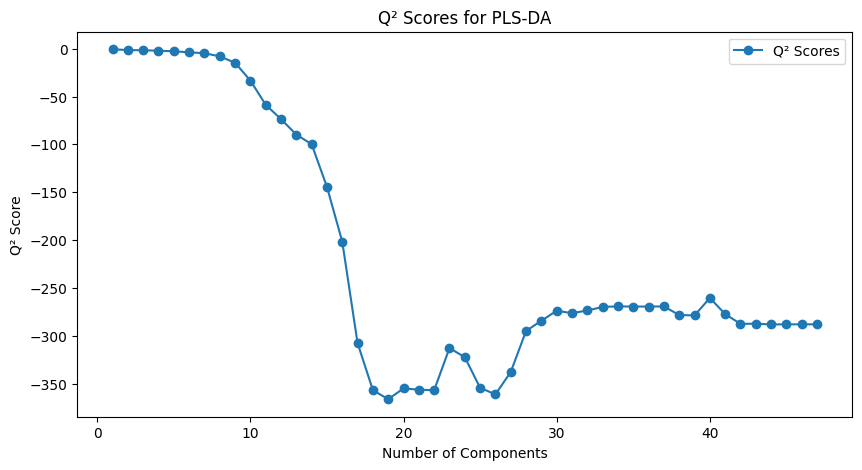

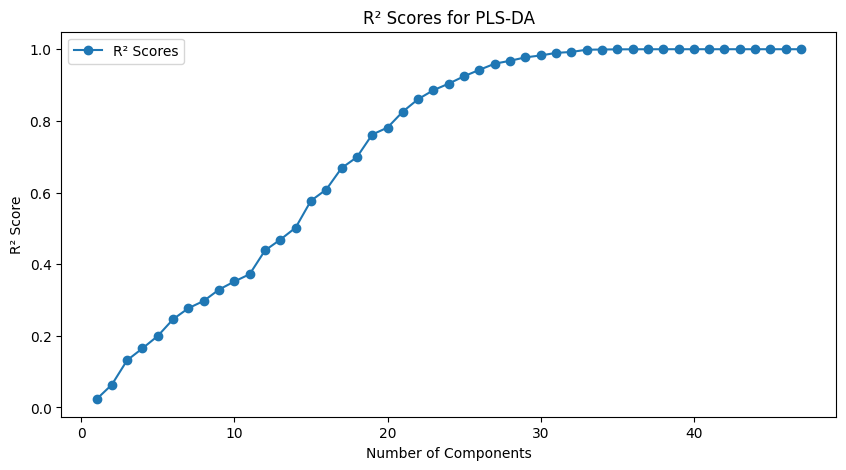

In [74]:
from sklearn.model_selection import cross_val_score, GroupKFold
from sklearn.metrics import r2_score
import warnings

# Disable warnings for the purpose of this demonstration
warnings.filterwarnings("ignore", category=UserWarning)

# Create a GroupKFold object to be used for cross-validation
group_kfold = GroupKFold(n_splits=5)

# Initialize arrays to store Q² and R² scores for each component
num_components = min(X.shape[0], X.shape[1])
q2_scores = np.zeros(num_components)
r2_scores = np.zeros(num_components)

# Perform PLS-DA and evaluate scores for each number of components
for i in range(1, num_components + 1):
    plsr = PLSRegression(n_components=i)
    
    # Cross-validation to get Q² score
    q2_scores[i - 1] = np.mean(cross_val_score(plsr, X, y, cv=group_kfold, groups=X.index))
    
    # Fit the model to get R² score
    plsr.fit(X, y)
    y_pred = plsr.predict(X)
    r2_scores[i - 1] = r2_score(y, y_pred)

# Plot Q² scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_components + 1), q2_scores, marker='o', label='Q² Scores')
plt.xlabel('Number of Components')
plt.ylabel('Q² Score')
plt.title('Q² Scores for PLS-DA')
plt.legend()
plt.show()

# Plot R² scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_components + 1), r2_scores, marker='o', label='R² Scores')
plt.xlabel('Number of Components')
plt.ylabel('R² Score')
plt.title('R² Scores for PLS-DA')
plt.legend()
plt.show()

In [71]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

# Cross-validation to get predicted y values
y_pred = cross_val_predict(plsr, X, y, cv=5)  # You can adjust the number of folds (cv) as needed

# Calculate Q² score
q2 = plsr.score(X, y)
print(f'Q² Score: {q2}')

# Calculate R2 score
r2 = r2_score(y, y_pred)
print(f'R2 Score: {r2}')

print(f"Q2/R2: {q2/r2}.")

Q² Score: 0.06348075500571992
R2 Score: -22.484460449860055
Q2/R2: -0.0028233168034999495.


In [34]:
import plotly.graph_objects as go

# Access the loadings from the PLSR object
loadings = plsr.x_loadings_

# Create a Plotly figure for PLS-DA Component 1 Loadings
fig1 = go.Figure()

# Add a line trace for the loadings of Component 1
fig1.add_trace(go.Scatter(x=combined_df2['RT(min)'], y=loadings[:, 0], mode='lines', name='PLS-DA Component 1 Loading'))

# Update layout with titles and labels for Component 1
fig1.update_layout(
    title='PLS-DA Component 1 Loading Plot',
    xaxis_title='RT (min)',
    yaxis_title='Loading Value'
)

# Show the interactive plot for Component 1
fig1.show()

# Create a Plotly figure for PLS-DA Component 2 Loadings
fig2 = go.Figure()

# Add a line trace for the loadings of Component 2
fig2.add_trace(go.Scatter(x=combined_df2['RT(min)'], y=loadings[:, 1], mode='lines', name='PLS-DA Component 2 Loading'))

# Update layout with titles and labels for Component 2
fig2.update_layout(
    title='PLS-DA Component 2 Loading Plot',
    xaxis_title='RT (min)',
    yaxis_title='Loading Value'
)

# Show the interactive plot for Component 2
fig2.show()


In [46]:
import numpy as np
import pandas as pd

# Calculate the VIP scores from the fitted PLS model
def calculate_vip_scores(pls_model, X):
    t = pls_model.x_scores_  # Scores
    w = pls_model.x_weights_  # Weights
    q = pls_model.y_loadings_  # Loadings
    p, h = w.shape
    vip = np.zeros((p,))
    s = np.diag(t.T @ t @ q.T @ q).reshape(h, -1)
    total_s = np.sum(s)

    for i in range(p):
        weight = np.array([(w[i, j] / np.linalg.norm(w[:, j]))**2 for j in range(h)])
        vip[i] = np.sqrt(p * (s.T @ weight) / total_s)

    return vip

# Assuming 'pls' is your fitted PLSRegression model
vip_scores = calculate_vip_scores(plsr, X)

# Create a DataFrame for VIP scores
vip_df = pd.DataFrame({'Variable': X.columns, 'VIP Score': vip_scores})

# Sort DataFrame by VIP Score in descending order
vip_df = vip_df.sort_values(by='VIP Score', ascending=False).head(10)

# Print or visualize VIP scores
vip_df


Variable  VIP Score
1717      1905   2.988395
1718      1906   2.982350
1716      1904   2.977565
1719      1907   2.966975
1720      1908   2.947327
1715      1903   2.944550
1721      1909   2.926492
1722      1910   2.906211
1723      1911   2.886258
1714      1902   2.881005

In [47]:
import plotly.express as px

# Create an interactive bar plot using Plotly Express
fig = px.bar(vip_df, 
             x='VIP Score', 
             y='Variable', 
             orientation='h',  # Horizontal bar plot
             title='VIP Scores of Variables in PLS Model')

# Update layout
fig.update_layout(
    xaxis_title='VIP Score',
    yaxis_title='Variable'
)

# Show the interactive plot
fig.show()

---

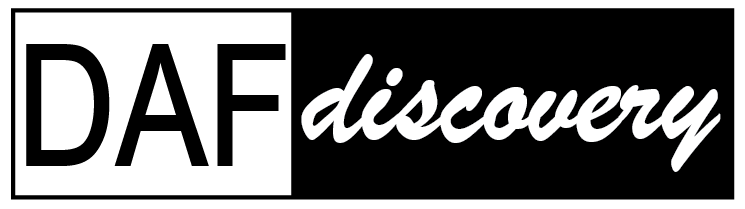

In [23]:
# Create the Target Vector for the supervision tool (PLS-DA)
Metadata = pd.read_csv("Metadata_analitica.csv", sep=";")
Metadata.columns

if ('HPLC_filename') in Metadata.columns and ('BioAct_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_HPLC_DAD_filename = Metadata['HPLC_filename'].values.tolist()
    Ordered_BioAct_filename = Metadata['BioAct_filename'].values.tolist()
    print('You are about to merge data from: HPLC-DAD + BioAct. Go for Option 3')
    data_inuse = ['HPLC-DAD', 'BioAct']


elif ('HPLC_filename') in Metadata.columns:
    Ordered_Samples = Metadata['Samples'].values.tolist()
    Ordered_HPLC_DAD_filename = Metadata['HPLC_filename'].values.tolist()    
    print('You are about to work with HPLC-DAD data alone. Have a look in what more you could do with additional data. . Go for Option 5')
    data_inuse = ['HPLC-DAD']
    
else: print('Error (sorry!), please check your Metadata')

print(f'Data in Use: {data_inuse}')

You are about to work with HPLC-DAD data alone. Have a look in what more you could do with additional data. . Go for Option 5
Data in Use: ['HPLC-DAD']


In [36]:
if data_inuse == ['HPLC-DAD']:
    # NMR
    HPLC_DAD = pd.read_csv('combined_data.csv', sep=';',header=0)   # assuming the NMR data was exported and saved as NMR.csv
    HPLC_DADdata = HPLC_DAD.drop(["RT(min)"], axis=1)
    axis = HPLC_DAD["RT(min)"]
    
else: print('Try the next one')

# REORDERING data according to the Metadata (Ordered_Samples)

HPLC_DAD = HPLC_DAD[Ordered_HPLC_DAD_filename] # reorder columns according to the sampleIDs
HPLC_DAD.rename(columns={i:j for i,j in zip(Ordered_HPLC_DAD_filename,Ordered_Samples)}, inplace=True) # rename column headers as sampleIDs

print('Data from NMR is reordered according to the Matadata.')

Data from NMR is reordered according to the Matadata.


In [46]:
# Chose driver to produce highlighted NMR spectra showing highly correlated peaks
from STOCSY import *
%matplotlib notebook

# DRIVER FROM THE HPLC_DAD data
driver = 21.0

corr, covar = STOCSY(driver, HPLC_DADdata, axis)


In [47]:
HPLC_DADdata.shape